In [265]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stat
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [266]:
# Reading the dataset

df = pd.read_csv('../input/medical-insurance/med-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [267]:
print('Shape of data {}'.format(df.shape))

Shape of data (1338, 7)


# Univariate Analysis

In [268]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [269]:
# Creating Weight status column for easy visualization.

df['weight_status']=['Underweight' if x<18.5 else 'Healthy' if x>18.5 and x<25 else 'Overweight' if x>25 and x<30 
                     else 'Obese' for x in df['bmi']]

In [270]:
# Creating age interval column for easy visualization.

df['age_']=df['age'].replace((np.arange(18,30),np.arange(30,70)),('18-30','30-70'))

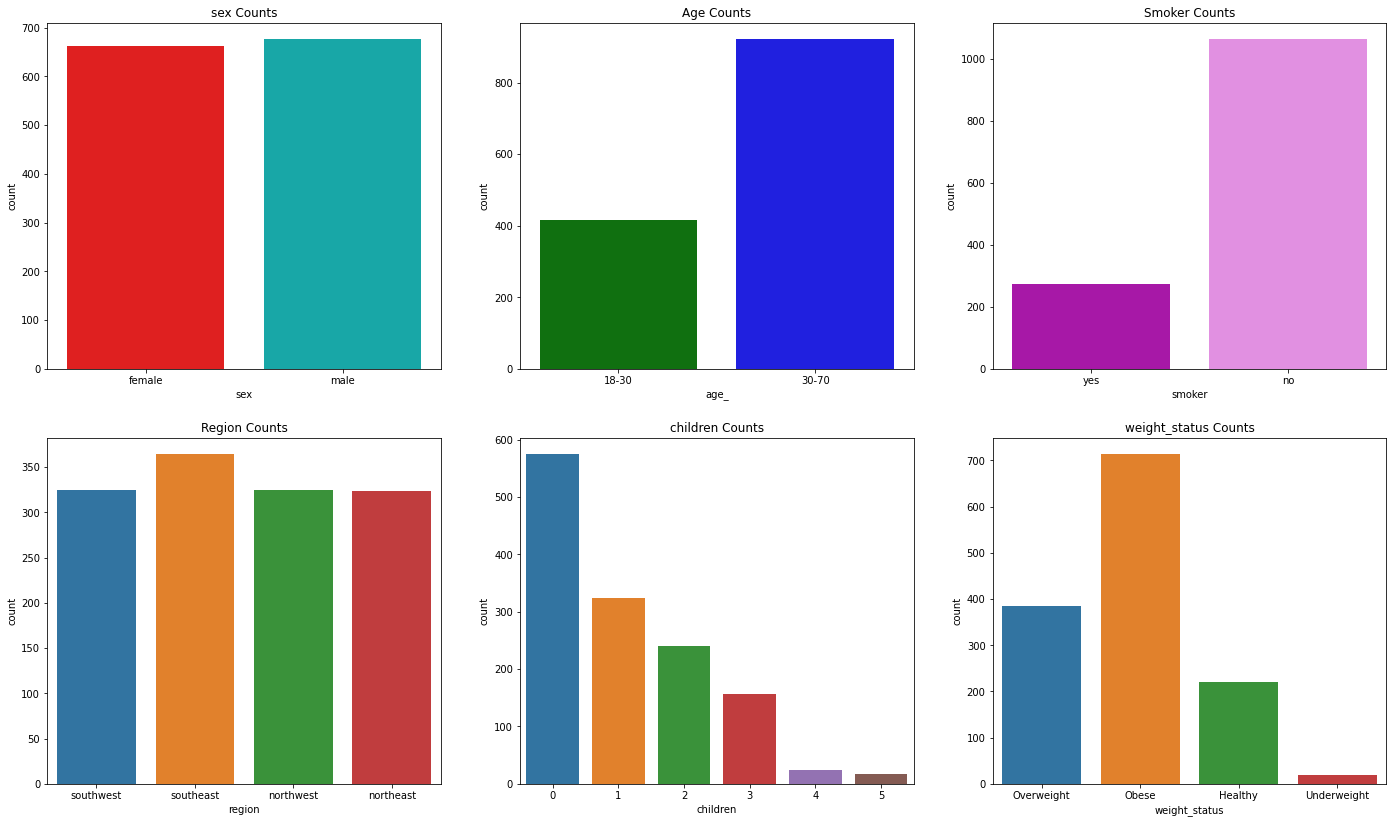

In [271]:
# Counts of categories in variables

plt.figure(figsize=(24,14))
plt.subplot(231)
sns.countplot(df['sex'],palette=['r','c'])
plt.title('sex Counts')

plt.subplot(232)
sns.countplot(df['age_'],palette=['g','b'])
plt.title('Age Counts')

plt.subplot(233)
sns.countplot(df['smoker'],palette=['m','violet'])
plt.title('Smoker Counts')

plt.subplot(234)
sns.countplot(df['region'])
plt.title('Region Counts')

plt.subplot(235)
sns.countplot(df['children'])
plt.title('children Counts')

plt.subplot(236)
sns.countplot(df['weight_status'])
plt.title('weight_status Counts')
plt.show()

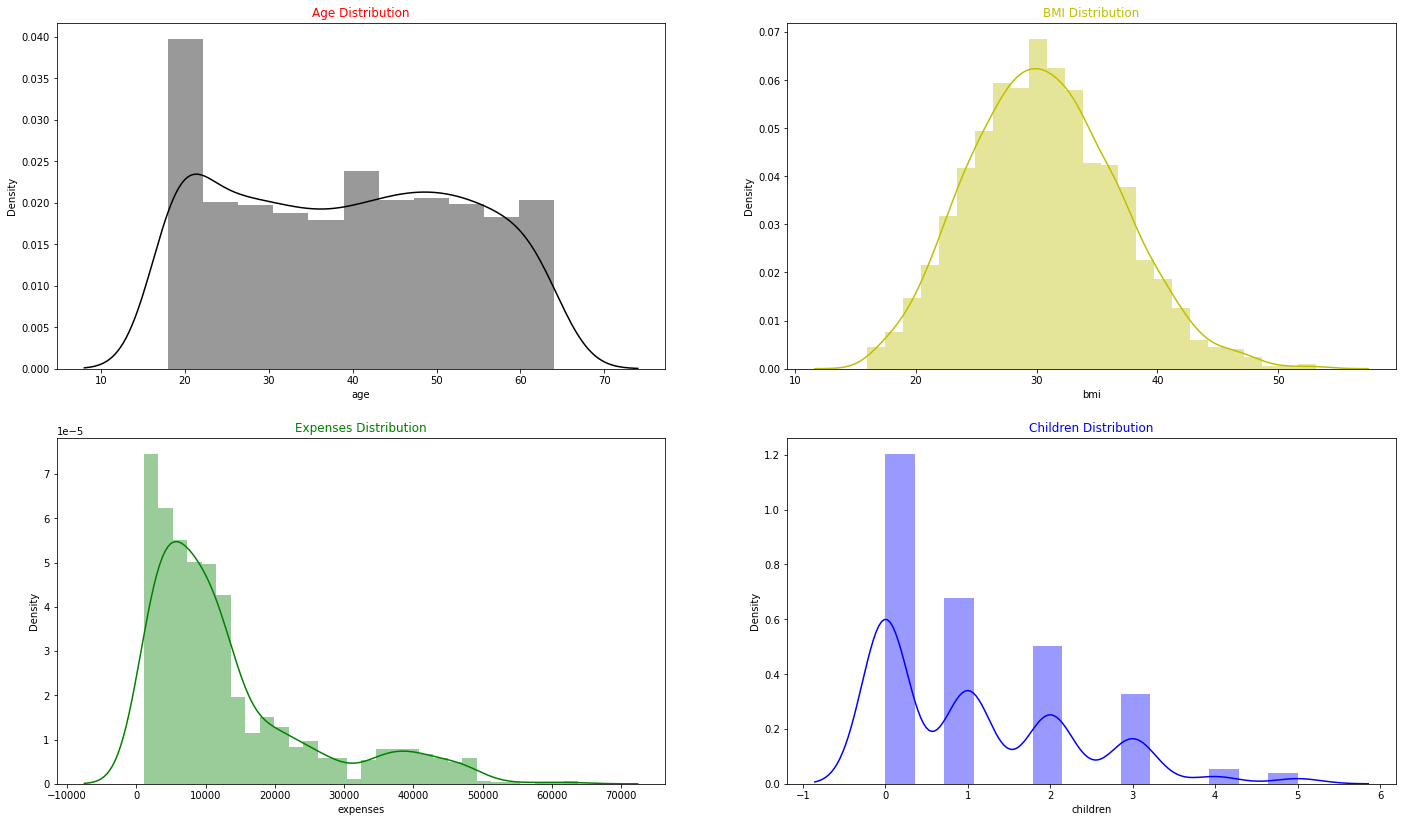

In [272]:
# Distribution of columns

plt.figure(figsize=(24,14))
plt.subplot(221)
sns.distplot(df['age'],color='black')
plt.title('Age Distribution',color='r')

plt.subplot(222)
sns.distplot(df['bmi'],color='y')
plt.title('BMI Distribution',color='y')

plt.subplot(223)
sns.distplot(df['expenses'],color='g')
plt.title('Expenses Distribution',color='g')

plt.subplot(224)
sns.distplot(df['children'],color='b')
plt.title('Children Distribution',color='b')
plt.show()

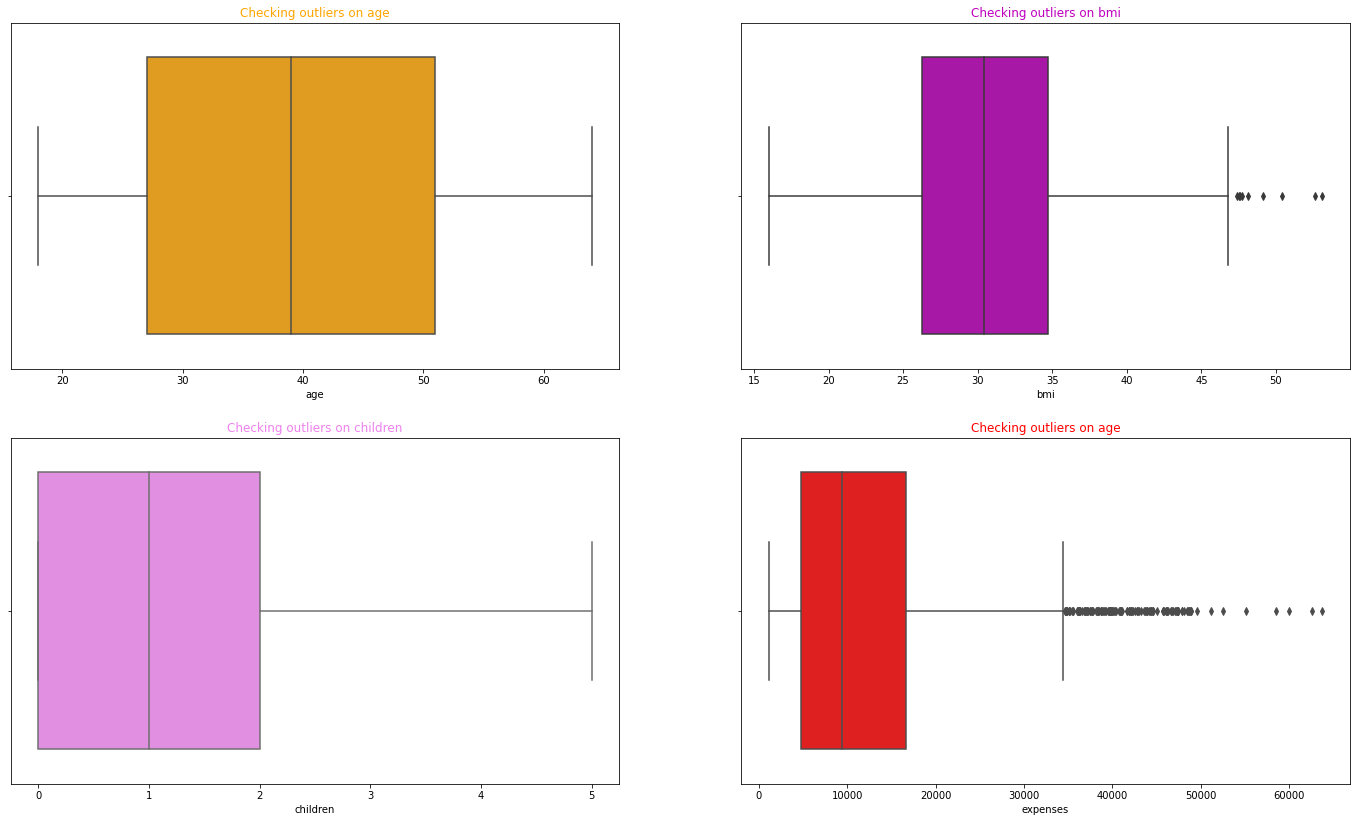

In [273]:
# Checking outliers

plt.figure(figsize=(24,14))
plt.subplot(221)
sns.boxplot(df['age'],color='orange')
plt.title('Checking outliers on age',color='orange')

plt.subplot(222)
sns.boxplot(df['bmi'],color='m')
plt.title('Checking outliers on bmi',color='m')

plt.subplot(223)
sns.boxplot(df['children'],color='violet')
plt.title('Checking outliers on children',color='violet')

plt.subplot(224)
sns.boxplot(df['expenses'],color='r')
plt.title('Checking outliers on age',color='r')
plt.show()

# Bivariate Analysis

In [274]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,weight_status,age_
0,19,female,27.9,0,yes,southwest,16884.92,Overweight,18-30
1,18,male,33.8,1,no,southeast,1725.55,Obese,18-30
2,28,male,33.0,3,no,southeast,4449.46,Obese,18-30
3,33,male,22.7,0,no,northwest,21984.47,Healthy,30-70
4,32,male,28.9,0,no,northwest,3866.86,Overweight,30-70


In [275]:
# Creating expence range column for easy visualization.

df['expence_range']=['1,000 - 10,000' if x<=10000 else '10,001 - 20,000' if x>10000 and x<=20000 
                     else '20,001 - 30,000' if x>20000 and x<=30000 else '30,001 - 40,000' if x>30000 and x<=40000 
                    else '40,001 - 50,000' if x>40000 and x<=50000 else '50,000 +' 
                    for x in df['expenses']]

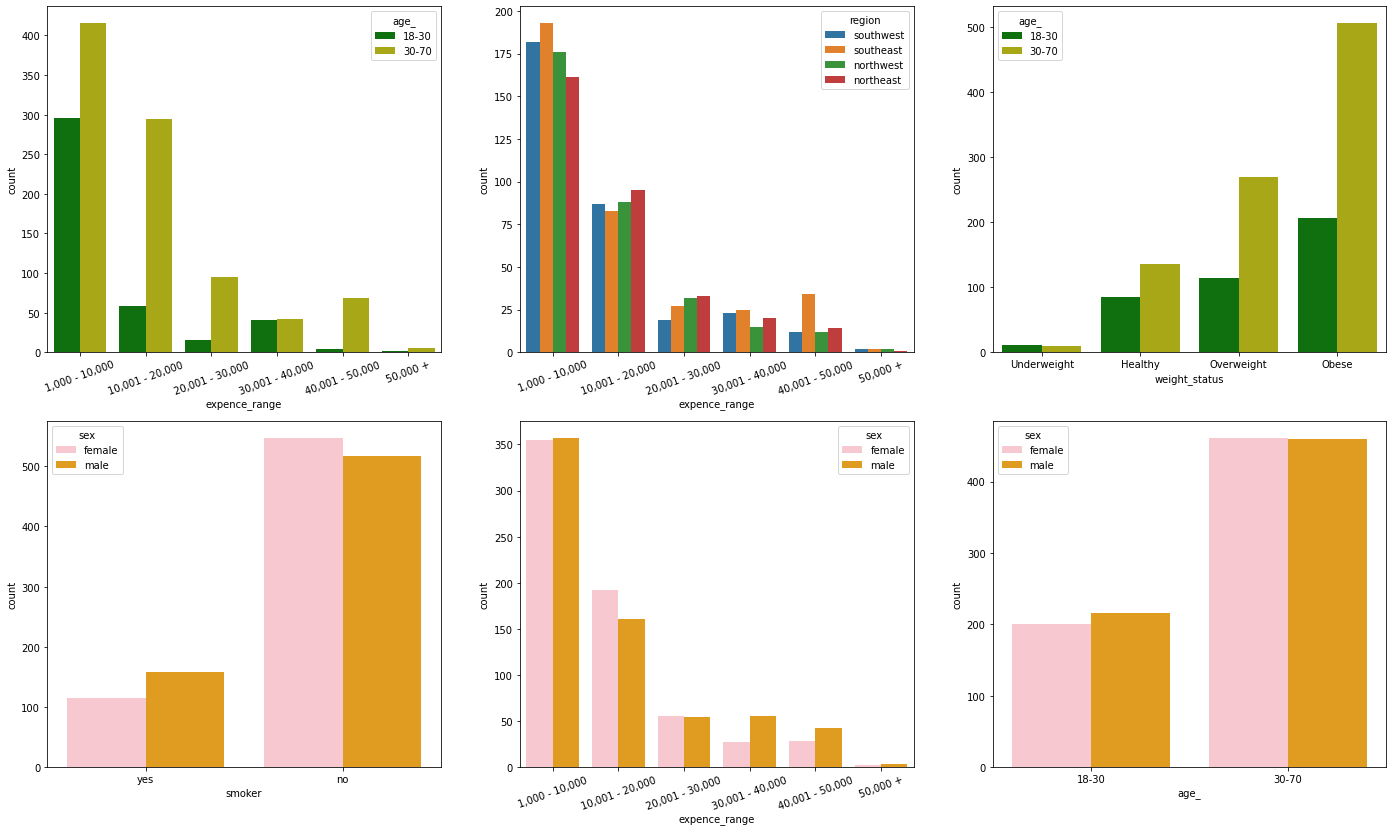

In [276]:

plt.figure(figsize=(24,14))
plt.subplot(231)
sns.countplot(df['expence_range'],hue=df['age_'],order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000',
                                                        '40,001 - 50,000','50,000 +'],palette=['g','y'])
plt.xticks(rotation=20)

plt.subplot(232)
sns.countplot(df['expence_range'],hue=df['region'],order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000',
                                                          '40,001 - 50,000','50,000 +'])
plt.xticks(rotation=20)

plt.subplot(233)
sns.countplot(df['weight_status'],hue=df['age_'],order=['Underweight','Healthy','Overweight','Obese'],palette=['g','y'])

plt.subplot(234)
sns.countplot(df['smoker'],hue=df['sex'],palette=['pink','orange'])

plt.subplot(235)
sns.countplot(df['expence_range'],hue=df['sex'],order=['1,000 - 10,000','10,001 - 20,000','20,001 - 30,000','30,001 - 40,000',
                                                       '40,001 - 50,000','50,000 +'],palette=['pink','orange'])
plt.xticks(rotation=20)

plt.subplot(236)
sns.countplot(df['age_'],hue=df['sex'],palette=['pink','orange'])
plt.show()

# Multivariate Analysis

<AxesSubplot:>

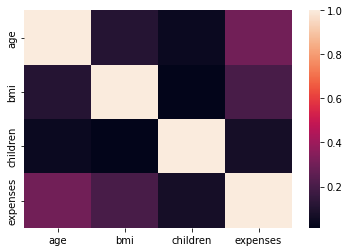

In [277]:
# Checking the corr

sns.heatmap(df.corr())

# Feature Engineering

In [278]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,weight_status,age_,expence_range
0,19,female,27.9,0,yes,southwest,16884.92,Overweight,18-30,"10,001 - 20,000"
1,18,male,33.8,1,no,southeast,1725.55,Obese,18-30,"1,000 - 10,000"
2,28,male,33.0,3,no,southeast,4449.46,Obese,18-30,"1,000 - 10,000"
3,33,male,22.7,0,no,northwest,21984.47,Healthy,30-70,"20,001 - 30,000"
4,32,male,28.9,0,no,northwest,3866.86,Overweight,30-70,"1,000 - 10,000"


In [279]:
df.drop(['age_','expence_range','weight_status'],axis=1,inplace=True)

# Data Processing

In [280]:
df.select_dtypes('object').head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [281]:
# Converting object to int

df['sex']=df['sex'].replace(('male','female'),(2,1))
df['smoker']=df['smoker'].replace(('yes','no'),(2,1))
df['region']=df['sex'].replace(('northeast','northwest','southwest','southeast'),(1,2,3,4))

In [282]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,2,21984.47
4,32,2,28.9,0,1,2,3866.86


In [283]:
x = df.drop(['expenses'],axis=1)
y = df['expenses']

In [284]:
print('Shape of x data {}'.format(x.shape))
print('Shape of y data {}'.format(y.shape))

Shape of x data (1338, 6)
Shape of y data (1338,)


In [285]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [286]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (1070, 6)
Shape of xtest (268, 6)
Shape of ytrain (1070,)
Shape of ytest (268,)


In [287]:
# Data Normalization

st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

# Machine Learning models

In [288]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression model***')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [289]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor Model***')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

In [290]:
def gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=(gb.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Gradient Boosting Regressor Model***')
    print('Score for Gradient Boosting Regressor Model is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor Model is {}'.format(rmse))
    return gb

In [291]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)

In [292]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

***Linear Regression model***
Score for Linear Regression model is 0.6931491538324287
RMSE for Linear Regression model is 6560.18633907841
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8050794060270166
RMSE for Random Forest Regressor Model is 5228.55132973854
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.8261377986652034
RMSE for Gradient Boosting Regressor Model is 4938.045643716708
----------------------------------------------------------------------------------------------------


In [293]:
# From the above models Gradient boosting regressor model is best
# Cross validation on Gradient boosting regressor

gb=GradientBoostingRegressor()
gb.fit(xtrain_scaled,ytrain)
ypred=(gb.predict(xtest_scaled))
score=r2_score(ytest,ypred)
print('Score for Gradient Boosting Regressor Model is {}'.format(score))

scores=cross_val_score(gb,x,y,cv=5)
print(scores)
print(np.mean(scores))

Score for Gradient Boosting Regressor Model is 0.8259551612366409
[0.87813694 0.79390087 0.88952825 0.84715651 0.85845365]
0.8534352461978052


# Model Improvement

In [294]:
# Gaussian transformation

def transform(data):
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.distplot(data)
    plt.subplot(122)
    stat.probplot(data,plot=plt)

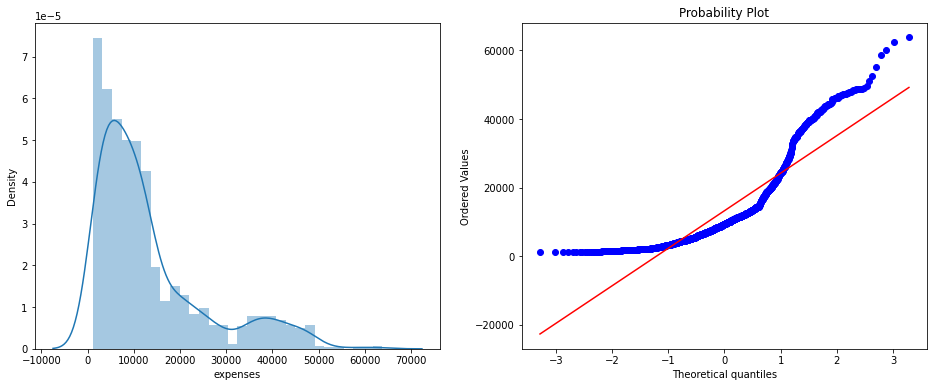

In [295]:
transform(y)

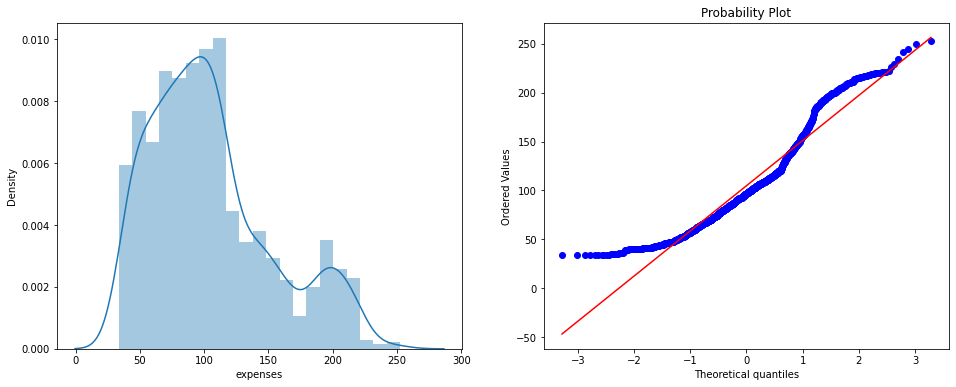

In [296]:
transform(np.sqrt(y))

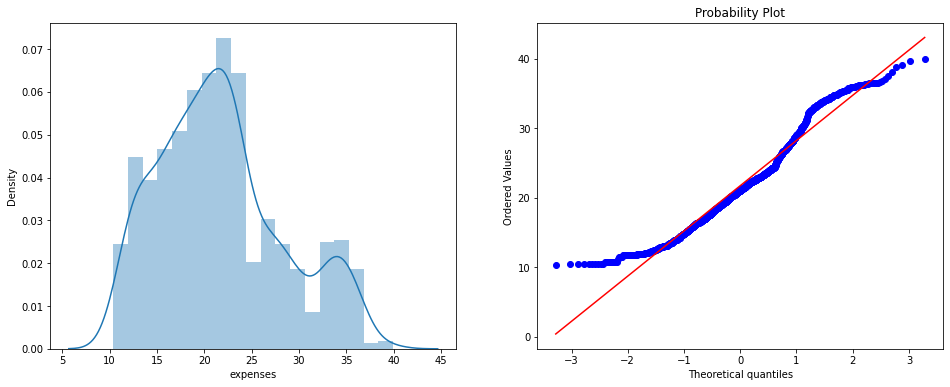

In [297]:
transform(np.cbrt(y))

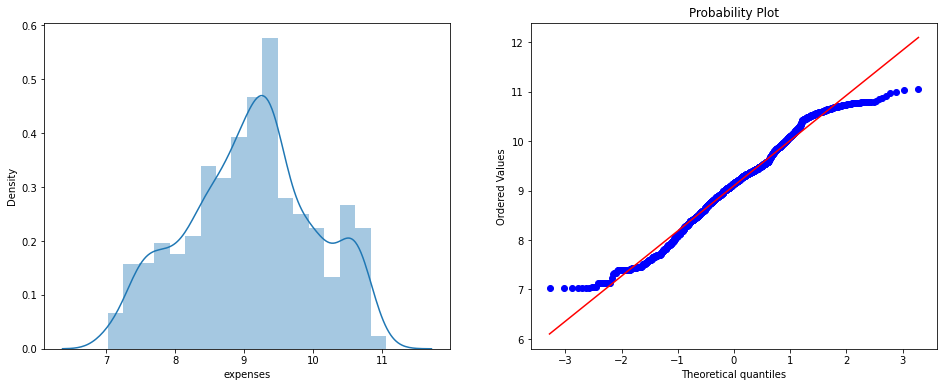

In [298]:
transform(np.log(y))

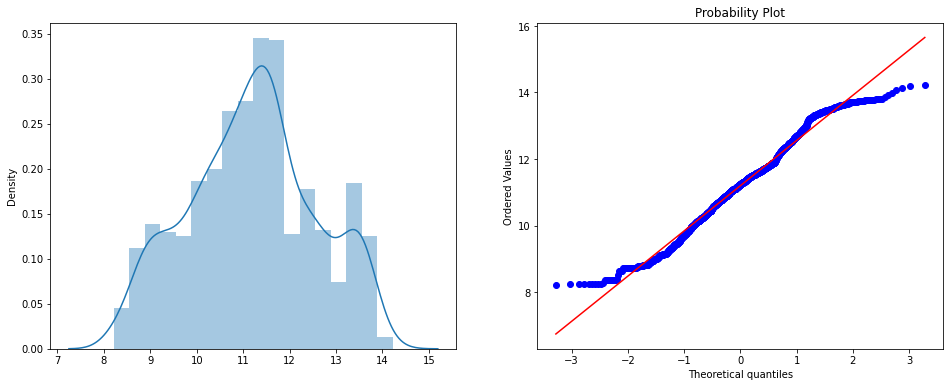

In [299]:
boxcox,params=stat.boxcox(y)
transform(boxcox)

In [300]:
# From the above log transformation is best
ytrain_log=np.log(ytrain)
ytest_log=np.log(ytest)

In [301]:
model_compare(xtrain_scaled,xtest_scaled,ytrain_log,ytest_log)

***Linear Regression model***
Score for Linear Regression model is 0.6979047012825492
RMSE for Linear Regression model is 0.49403030091310685
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.7505330699596824
RMSE for Random Forest Regressor Model is 0.4489397855285739
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.7805740306046972
RMSE for Gradient Boosting Regressor Model is 0.4210421903353296
----------------------------------------------------------------------------------------------------


In [302]:
# From the above models Gradient boosting regressor model is best
# Cross validation on Gradient boosting regressor

gb2=GradientBoostingRegressor()
gb2.fit(xtrain_scaled,ytrain_log)
ypred=(gb2.predict(xtest_scaled))
score=r2_score(ytest_log,ypred)
print('Score for Gradient Boosting Regressor Model is {}'.format(score))

scores2=cross_val_score(gb2,x,y,cv=5)
print(scores2)
print(np.mean(scores2))

Score for Gradient Boosting Regressor Model is 0.7809594085148035
[0.8781405  0.79797871 0.88952825 0.84733481 0.85852461]
0.8543013762822367


In [303]:
print('Before model improvement the mean of cross_val_score is {}'.format(np.mean(scores)))
print('After model improvement the mean of cross_val_score is {}'.format(np.mean(scores2)))

Before model improvement the mean of cross_val_score is 0.8534352461978052
After model improvement the mean of cross_val_score is 0.8543013762822367
